# Алгоритмы уменьшения размерности

Повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf).

Необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import dataget

from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [30]:
import warnings
warnings.filterwarnings('ignore')

## Загрузка датасетов

### COIL20

In [5]:
df_coil = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/coil20.csv')

### MNIST

In [6]:
df_mnist = pd.read_csv('https://www.openml.org/data/get_csv/52667/mnist_784.csv')
df_mnist = df_mnist[:10000]

### Fashion MNIST

In [11]:
_, _, fmnist_x, fmnist_y = dataget.image.fashion_mnist().get()
df_fmnist = fmnist_x.reshape(-1, 28 * 28)

### Word Vectors

In [13]:
from gensim.models import Word2Vec
from gensim.downloader import load

In [14]:
word_vectors = load('word2vec-google-news-300').vectors
word_vectors = word_vectors[:10000]

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### Алгоритмы

In [31]:
umap = UMAP(random_state=5)
tsne = TSNE(n_components=2, random_state=5, n_jobs=-1)
pca = PCA(n_components=2)

In [32]:
algorithms = [('UMAP', umap), ('t-SNE', tsne), ('PCA', pca)]

data_sets = [('COIL20', df_coil.drop(columns='1025'), df_coil['1025']), 
            ('MNIST', df_mnist, df_mnist['class']), 
            ('Fashion MNIST', df_fmnist, fmnist_y), 
            ('Word Vectors', word_vectors, None)]

algorithms_number = len(algorithms)
data_sets_number = len(data_sets)

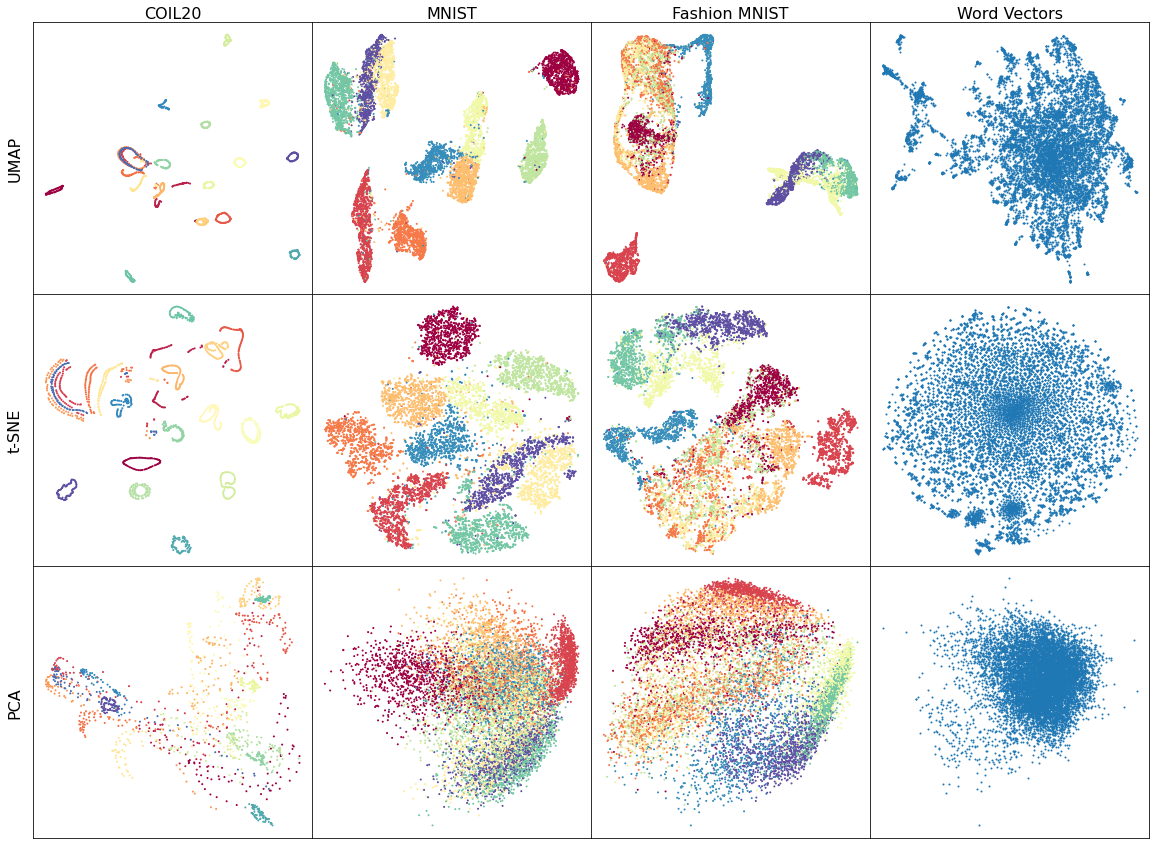

In [33]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_gridspec(algorithms_number, data_sets_number, hspace=0, wspace=0).subplots()

for j in range(data_sets_number):
    ax[0, j].set_xlabel(data_sets[j][0], fontsize=16)   
    ax[0, j].xaxis.set_label_position('top') 

for i in range(algorithms_number):
    ax[i, 0].set_ylabel(models[i][0], fontsize=16)

for i in range(algorithms_number):
    for j in range(data_sets_number):
        embedding = models[i][1].fit_transform(data_sets[j][1])
        ax[i, j].scatter(-embedding[:, 0], -embedding[:, 1], c=data_sets[j][2], cmap='Spectral', s=1)
        ax[i, j].tick_params(left = False, bottom=False)
        ax[i, j].set_yticklabels([])
        ax[i, j].set_xticklabels([])